# **Disease Prediction**

In [ ]:
The aim of this project is to build atrifitial neural network that can predict diseases

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestmodel

# Set Matplotlib defaults
sns.set_style('darkgrid')
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from keras.models import Model

In [2]:
# Loading the dataset
df = pd.read_csv('Disease_Prediction.csv')
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [3]:
df.shape

(4920, 134)

In [4]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['Missing:np.nan'] = (df.isnull()).sum()
    summary_df['Missing:None'] = (df == "None").sum()
    summary_df['total'] =  summary_df['Missing:np.nan'] + summary_df['Missing:None']
    summary_df['Percent'] = 100*summary_df['total']/len(df)
    summary_df['Duplicates'] = df.duplicated().sum()
    summary_df['Unique'] = df.nunique().values
    summary_df['Count'] = df.count().values
    return summary_df.sort_values(ascending = False, by = 'Percent')

summary(df).style.background_gradient(cmap='Blues')

,dtypes,Missing:np.nan,Missing:None,total,Percent,Duplicates,Unique,Count
Unnamed: 133,float64,4920,0,4920,100.000000,4616,0,0
spinning_movements,int64,0,0,0,0.000000,4616,2,4920
altered_sensorium,int64,0,0,0,0.000000,4616,2,4920
muscle_pain,int64,0,0,0,0.000000,4616,2,4920
irritability,int64,0,0,0,0.000000,4616,2,4920
depression,int64,0,0,0,0.000000,4616,2,4920
toxic_look_(typhos),int64,0,0,0,0.000000,4616,2,4920
internal_itching,int64,0,0,0,0.000000,4616,2,4920
passage_of_gases,int64,0,0,0,0.000000,4616,2,4920
continuous_feel_of_urine,int64,0,0,0,0.000000,4616,2,4920


In [5]:
df.drop(['Unnamed: 133'],axis = 1, inplace = True)

In [7]:
# Split the dataset
X = df.drop(['prognosis'], axis = 1)
y = df['prognosis']

In [8]:
# Encode the target feature
y,_ = y.factorize()
y

array([ 0,  0,  0, ..., 38, 39, 40], dtype=int64)

In [9]:
# Train- test split
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,shuffle =True)

print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 1476
number of training samples: 3444


## Features importance MI scores

In [ ]:
discrete_features = X_train.dtypes == int

In [ ]:
from sklearn.feature_selection import mutual_info_classif
def make_mi_scores(X_train,y_train,discrete_features):
    mi_scores = mutual_info_classif(X_train,y_train,discrete_features =discrete_features )
    mi_scores = pd.Series(mi_scores, name = "MI Scores", index = X_train.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores
mi_scores =  make_mi_scores(X_train,y_train,discrete_features)
mi_scores

fatigue                0.600233
vomiting               0.561947
high_fever             0.520853
loss_of_appetite       0.497386
headache               0.476651
                         ...   
sunken_eyes            0.082154
spinning_movements     0.079444
patches_in_throat      0.078895
foul_smell_of urine    0.078421
fluid_overload         0.000000
Name: MI Scores, Length: 132, dtype: float64

## Features scaling

In [10]:
# X_train Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(df_scaled, columns = X_train.columns)
# X_valid Scaling
df_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(df_scaled, columns = X_test.columns)

In [16]:
y_train_dum = pd.get_dummies(y_train)
y_train_dum

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3440,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3441,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3442,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Modelling

In [15]:
model = Sequential()

In [18]:
# adding first hidden layer with input layer. there is init parameter that represents how to initialize weights
model.add(Dense(64, activation = "relu", input_dim = X_train.shape[1]))
# adding second hidden layer
model.add(Dense(32, activation = "relu"))
# adding last layer
model.add(Dense(y_train_dum.shape[1], activation = "softmax"))

In [19]:
# compile the model
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                8512      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 41)                1353      
                                                                 
Total params: 16137 (63.04 KB)
Trainable params: 16137 (63.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# training the model
history = model.fit(X_train, y_train_dum, batch_size = 64,validation_split=0.20, epochs = 25)

Epoch 1/25
44/44 [==============================] - 2s 45ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 2/25
44/44 [==============================] - 1s 14ms/step - loss: 9.5387e-04 - accuracy: 1.0000 - val_loss: 8.9420e-04 - val_accuracy: 1.0000
Epoch 3/25
44/44 [==============================] - 0s 8ms/step - loss: 8.3009e-04 - accuracy: 1.0000 - val_loss: 7.9722e-04 - val_accuracy: 1.0000
Epoch 4/25
44/44 [==============================] - 0s 9ms/step - loss: 7.3374e-04 - accuracy: 1.0000 - val_loss: 7.3038e-04 - val_accuracy: 1.0000
Epoch 5/25
44/44 [==============================] - 0s 11ms/step - loss: 6.4685e-04 - accuracy: 1.0000 - val_loss: 6.6775e-04 - val_accuracy: 1.0000
Epoch 6/25
44/44 [==============================] - 0s 9ms/step - loss: 5.8336e-04 - accuracy: 1.0000 - val_loss: 6.1495e-04 - val_accuracy: 1.0000
Epoch 7/25
44/44 [==============================] - 1s 11ms/step - loss: 5.2359e-04 - accuracy: 1.0000 - val_loss: 5.

In [32]:
# make predictions
prediction = model.predict(X_test)

47/47 [==============================] - 0s 1ms/step


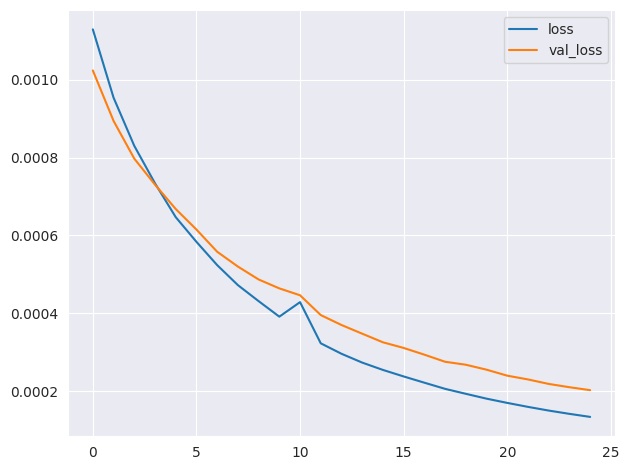

In [36]:
# visualize the result
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show();

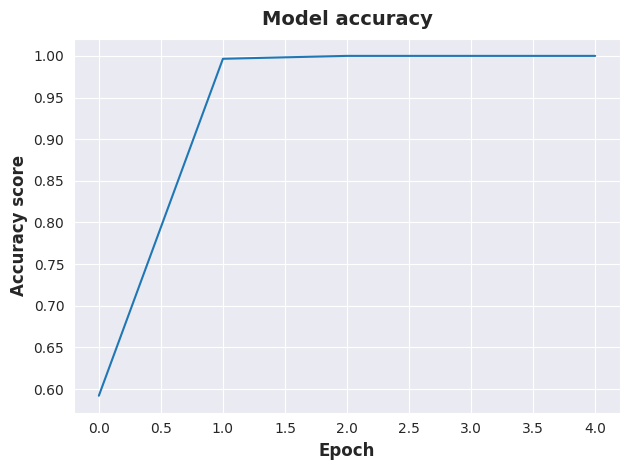

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy score")
plt.show()